# 4、实现逻辑回归

加载鸢尾花数据集。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

为了可视化方便，我们只使用其中的两个特征和两个类别进行训练，看看逻辑回归的效果。

In [2]:
X = X[y < 2, :2]
y = y[y < 2]

In [3]:
X.shape, y.shape

((100, 2), (100,))

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


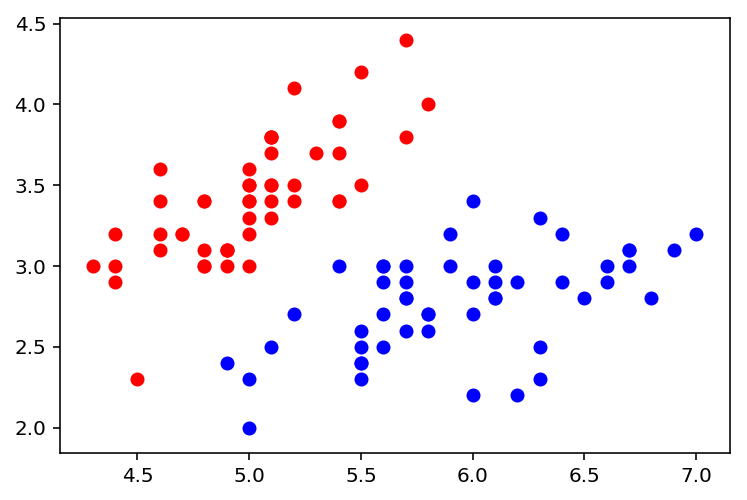

In [4]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b')
plt.show()

实现我们自己的逻辑回归（使用梯度下降法），目标函数关于向量 $w$ 的梯度函数如下：

$$
\begin{pmatrix}
\cfrac{\partial}{\partial w_0}J(w)  \\
\cfrac{\partial}{\partial w_1}J(w) \\
\cfrac{\partial}{\partial w_2}J(w) \\
\vdots \\
\cfrac{\partial}{\partial w_n}J(w) \\
\end{pmatrix}
= \frac{1}{m} \left(\left(\pi(X \cdot w) - y \right)^T \cdot X \right)^T
= \frac{1}{m} X^T \cdot \left(\pi(X \cdot w) - y \right)
$$

使用我们自己编写的逻辑回归模型，通过梯度下降法求得逻辑回归模型的参数 $w$。

In [5]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [6]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [7]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

我们来看看 ${\rm sigmoid}$ 函数的值，$>=0.5$ 的部分，predict 的结果就是 1。

In [8]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.17601199, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [9]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

这里的 score 使用 accuracy_score 作为评价指标。

In [10]:
log_reg.score(X_test, y_test)

1.0

可以看到，全部预测正确。

下一节，我们来学习对于分类问题而言的一个非常重要的概念，决策边界。